In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pint as pt
import scipy.constants as sc

%matplotlib inline
rcParams['font.family'] = 'Times New Roman'
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 18

[]

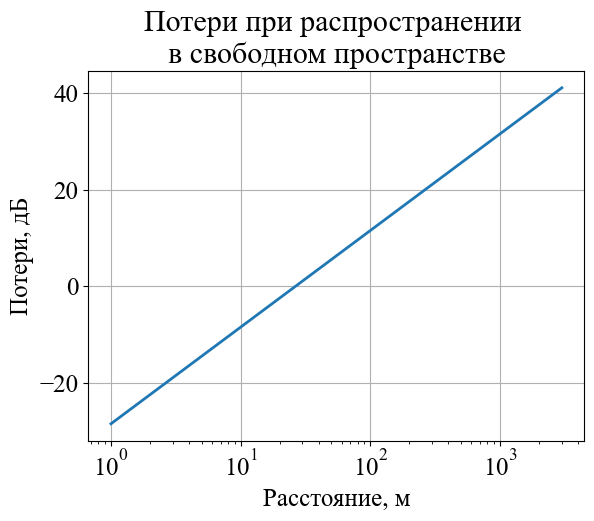

In [5]:
# В свободном пространстве

d = np.linspace(0.001, 3, 10000)      # массив расстояний
freq = 900 * 10 ** 6                    # частота
c = 3 * 10 ** 8
wavelength = c/freq                     # длина волны
Los_freespace = -147.56 + 20 * np.log10(freq) + 20 * np.log10(d)

plt.plot(d * 1000, Los_freespace)
plt.grid(True)
plt.xlabel('Расстояние, м')
plt.ylabel('Потери, дБ')
plt.title('Потери при распространении \nв свободном пространстве')
plt.semilogx()

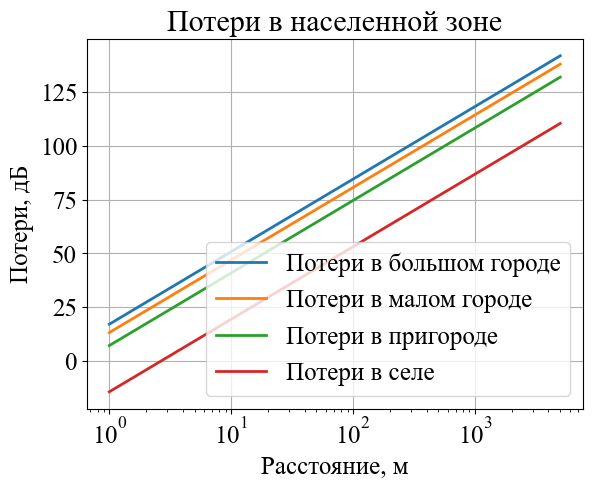

In [3]:
# Модель Окамуры-Хата
h_t = 50    # Высота передающей антенны
h_r = 5     # Высота приемной антенны
f_Hz = 900  # Частота в МГц, которая нужна для рассчетов по формуле Хата

L_city = 69.55 + 26.16 * np.log10(f_Hz) - 13.82 * np.log10(h_t) + (44.9 - 6.55 * np.log10(h_t)) * np.log10(d)

A_small = (1.1 * np.log10(f_Hz) - 0.7) * h_r - (1.56 * np.log10(f_Hz) - 0.8)    # Коэффициент ослабления для малых городов

A_big = 3.2 * (np.log10(11.75 * h_r)) ** 2 - 4.97   # Коэффициент ослабления для больших городов

L_small = L_city - A_small    # Потери в малых городах
L_big = L_city - A_big        # Потери в больших городах

L_suburbs = - 2 * np.log10(f_Hz / 28) ** 2 - 5.4
L_suburbs += L_big # Потери в пригороде

L_country = - 4.78 * np.log10(f_Hz) ** 2 + 17.33 * np.log10(f_Hz) - 40.94
L_country += L_big     # Потери в сельской местности

# Графики зависимостей потерь от расстояния
plt.plot(d * 1000, L_big, label = 'Потери в большом городе')
plt.plot(d * 1000, L_small, label = 'Потери в малом городе')
plt.plot(d * 1000, L_suburbs, label = 'Потери в пригороде')
plt.plot(d * 1000, L_country, label = 'Потери в селе')
plt.semilogx()
plt.grid(True)
plt.title('Потери в населенной зоне')
plt.ylabel('Потери, дБ')
plt.xlabel('Расстояние, м')
plt.legend()

Text(0.5, 1.0, 'Потери в модели Ксю-Бертони')

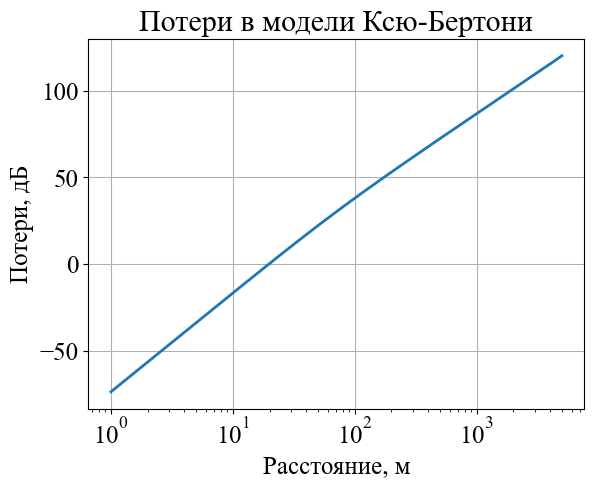

In [4]:
# Модель Ксю-Бертони // Walfisch-Bertoni
h_bs = 85           # Высота базовой станции
h_roof = 55         # Высота крыш
street_d = 20       # Ширина улиц
h_0 = 1.5           # Высота приемного мобильного устройства

alpha = (h_bs - h_roof)/d
w = alpha / np.sqrt(street_d / wavelength)
A = 5 * np.log10( (w/2) ** 2 + (h_roof -  h_0) ** 2 ) - 9 * np.log10(w) + 20 * np.log10( np.arctan( (2 * (h_roof - h_0) ) / w ))
L_kb = 57.1 + A + np.log10(freq) + 18 * np.log10(d) - 18 * np.log10(h_bs - h_roof) - 18 * np.log10(1 - d ** 2 / (17 * (h_bs - h_roof))) + Los_freespace

plt.plot(d * 1000, L_kb)
plt.semilogx()
plt.grid(True)
plt.xlabel('Расстояние, м')
plt.ylabel('Потери, дБ')
plt.title ('Потери в модели Ксю-Бертони')

[]

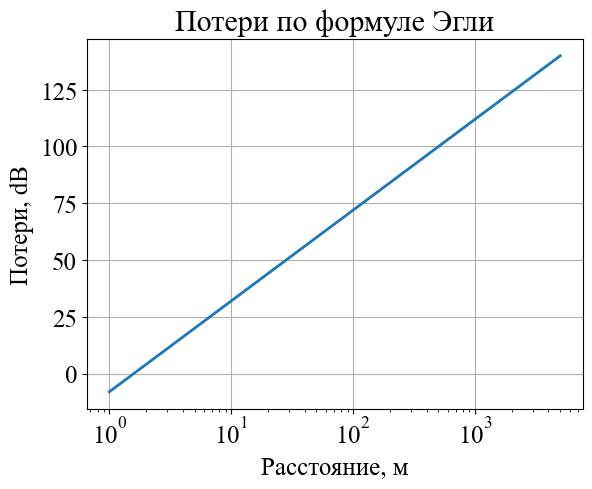

In [15]:
L_Egly = 20*np.log10(d ** 2/h_bs* h_0) + 20*np.log10(freq/40) #Потери по формуле Эгли
plt.plot(d*1000, L_Egly)
plt.ylabel('Потери, dB')
plt.xlabel('Расстояние, м')
plt.title('Потери по формуле Эгли')
plt.grid(True)
plt.semilogx()

[]

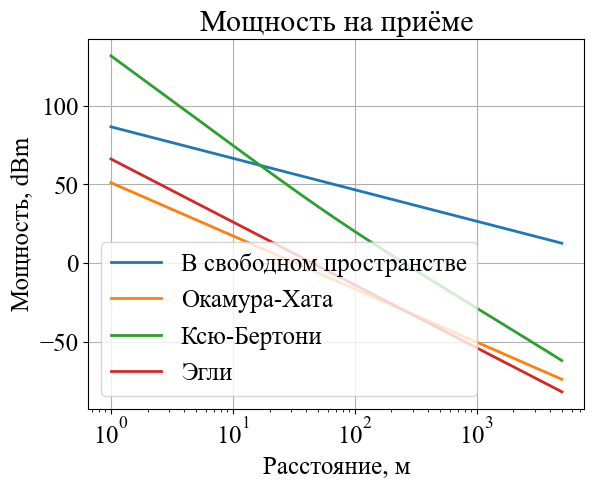

In [6]:
P_t = 100 # Ватт
G = 4 # дБ
P_t = 10 * np.log10(P_t/0.001) # Ватт в дБ
P_r =  P_t + G * 2
P_r_freespace = P_r - Los_freespace
P_r_Hata = P_r - L_suburbs
P_r_KB = P_r - L_kb
P_r_Egly = P_r - L_Egly



plt.plot(d*1000, P_r_freespace, label='В свободном пространстве') # Потери в свободном пространстве
plt.plot(d*1000, P_r_Hata, label='Окамура-Хата') # Потери Хата
plt.plot(d*1000, P_r_KB, label='Ксю-Бертони') # Потери Хата
plt.plot(d*1000, P_r_Egly, label='Эгли') # Потери Хата
plt.legend(loc='lower left')
plt.xlabel('Расстояние, м')
plt.ylabel('Мощность, dBm')
plt.title('Мощность на приёме')
plt.grid(True)
plt.semilogx()

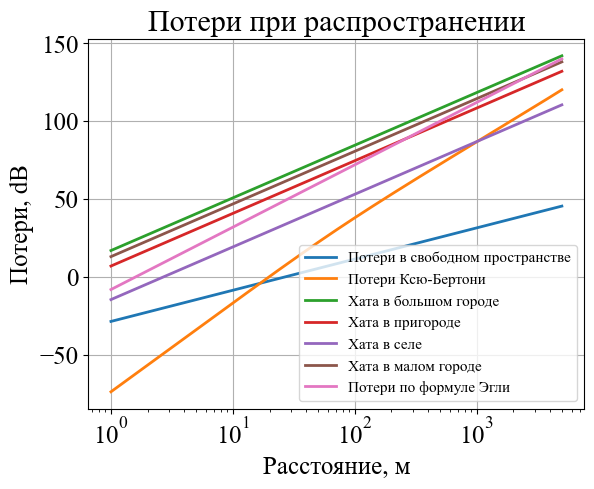

In [16]:
# Графики всех потерь вместе

plt.plot( d * 1000, Los_freespace, label='Потери в свободном пространстве')
plt.plot( d * 1000, L_kb, label='Потери Ксю-Бертони')
plt.plot( d * 1000, L_big, label='Хата в большом городе')
plt.plot( d * 1000, L_suburbs, label='Хата в пригороде')
plt.plot( d * 1000, L_country, label='Хата в селе')
plt.plot( d * 1000, L_small, label='Хата в малом городе')
plt.plot( d * 1000, L_Egly, label='Потери по формуле Эгли')
plt.ylabel('Потери, dB')
plt.xlabel('Расстояние, м')
plt.title('Потери при распространении')
plt.grid(True)
plt.semilogx()
plt.legend(fontsize=11, loc='lower right')

C:\Projects\pulses-comparer\models\Propogation_losses\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Projects\pulses-comparer\models\Propogation_losses\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


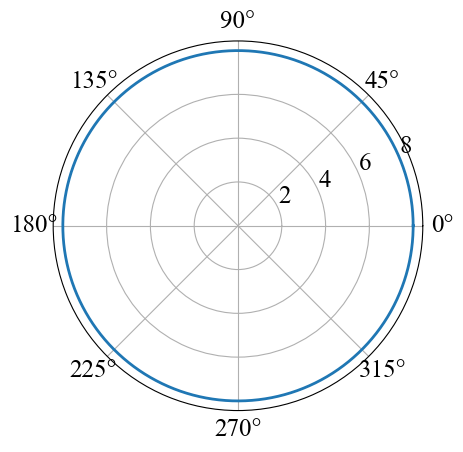

In [22]:
N = 8
phi = np.linspace(0, 2 * np.pi, 1000)
phi0 = np.pi
R = wavelength / 2
i = 0

sum_ind = 0
while i < N:
    a = i * 2 * np.pi / N
    sum_ind += np.exp(sc.k * 1j * R * (np.cos(phi - a) - np.cos(phi0 - a)))
    i += 1

plt.polar(phi, sum_ind)